##TSF - Task 2 To Explore Supervised Machine Learning

- In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.
- Data can be found at http://bit.ly/w-data

### <u>Problem Statement:</u> What will be predicted score if a student study for 9.25 hrs in a day?

###Simple Linear Regression

In [34]:
#Importing required libraries
#pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

###Importing Data

In [35]:
#Importing dataset using pandas function read_csv()
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Importing Data Completed")

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###Exploring Dataset

In [75]:
#Exploring Column names
student_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Exploring few rows of the dataset
student_data.head(5)

In [ ]:
#Exploratory analysis
student_data.info()

In [77]:
#Summary of the dataset
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [79]:
#Checking for null or missing values
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [81]:
#Correlation between two columns
covariance = student_data.cov()
#Observed Correlation between the columns is 62.33
print(covariance)

          Hours      Scores
Hours    6.3761   62.331500
Scores  62.3315  639.426667


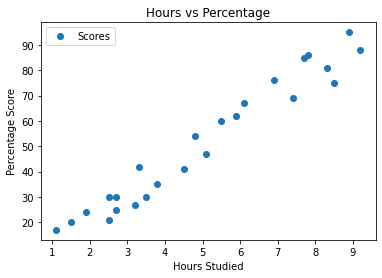

In [36]:
#Plotting the distribution of scores
student_data.plot(x ='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

###Data Preparation

In [82]:
#Splitting columns into two variables
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:,1].values

print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [83]:
#Importing train_test_split function from sklearn package
from sklearn.model_selection import train_test_split  

#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=1) 
print(X_train)
print(X_test)
print(y_train)
print(y_test)

###Training the Model

In [84]:
#Importing linear regression function from sklearn package
from sklearn.linear_model import LinearRegression  

#Building linear regression function
regressor = LinearRegression()

#Training the linear regression model
regressor.fit(X_train,y_train)
print("Model Training is completed")

Model Training is completed


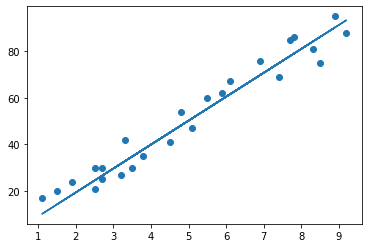

In [85]:
#Plotting the linear regression line
line = regressor.coef_*x+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

###Making Predictions

In [87]:
#Making predictions for testing data
print(X_test) 
y_pred = regressor.predict(X_test)
print(y_pred)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]]
[10.1519013  32.73976133 18.36566858 86.12924869 48.14057499 77.91548141
 61.48794684]


###Comparing Predicted vs Actual 

In [88]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,10.151901
1,42,32.739761
2,24,18.365669
3,75,86.129249
4,54,48.140575
5,85,77.915481
6,67,61.487947


In [90]:
#Prediction for sample data
hours = 9.25
new_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 93.82965552496628


###Model Evaluation

In [94]:
#Model evaluation using metrics function
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test,y_pred))
print('R-Squared Score:',
      metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 7.3325591780007
Mean Squared Error: 57.59433403253168
R-Squared Score: 0.8980888932690289
